<a href="https://colab.research.google.com/github/Abhilash-Bee/MachineLearning_DeepLearning_Projects/blob/main/Classification/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Project**

### **Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

### **Getting the data**

In [ ]:
import zipfile

file = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/ClassificationProjects/1. Titanic/titanic.zip')
file.extractall()
file.close()

In [ ]:
file_dir = '/content/titanic'

import os

print(os.listdir(file_dir))

['test.csv', 'gender_submission.csv', 'train.csv']


In [ ]:
test_dir = file_dir + '/test.csv'
gender_dir = file_dir + '/gender_submission.csv'
train_dir = file_dir + '/train.csv'

### File to Dataframe

In [ ]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
gender_df = pd.read_csv(gender_dir)

In [ ]:
# @title
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**About Data:** Found that 5 columns are `object`, 5 columns are `int64` and 2 columns are `float64`.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
np.percentile(train_df['Parch'], 90)

2.0

In [ ]:
train_df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Univariate Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

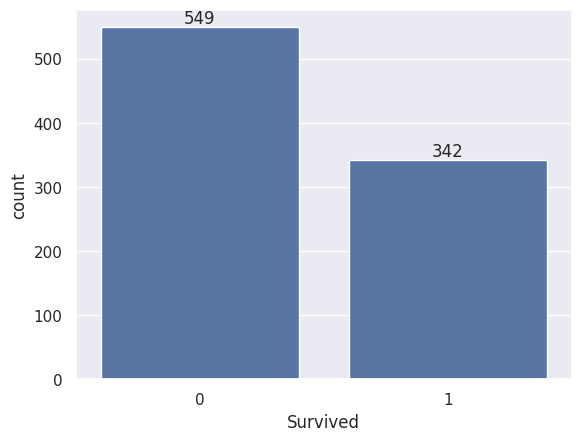

In [ ]:
# @title Survived
sns.set_theme()
ax = sns.countplot(train_df, x='Survived')
ax.bar_label(ax.containers[0]);

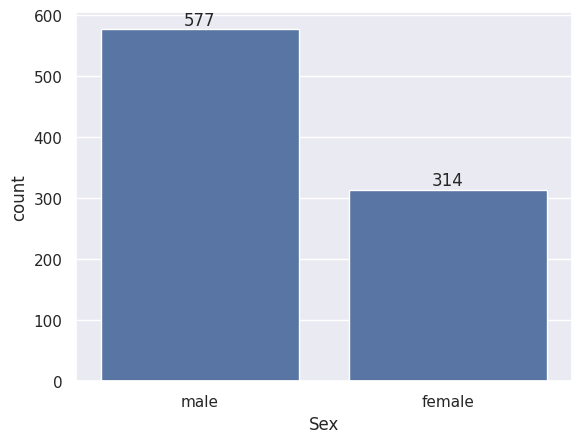

In [ ]:
# @title Sex
ax=sns.countplot(train_df, x='Sex')
ax.bar_label(ax.containers[0]);

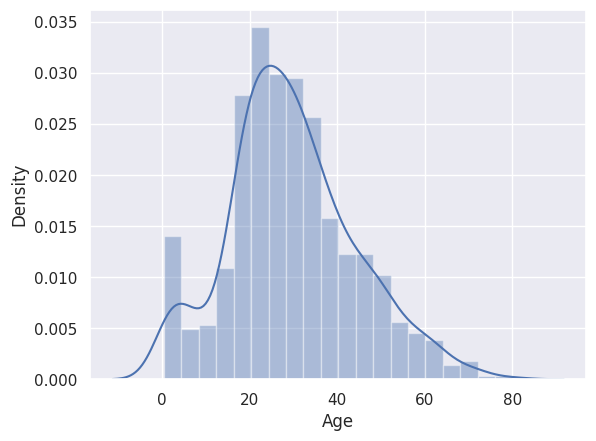

In [ ]:
sns.distplot(train_df['Age']);

## Bivariate Analysis

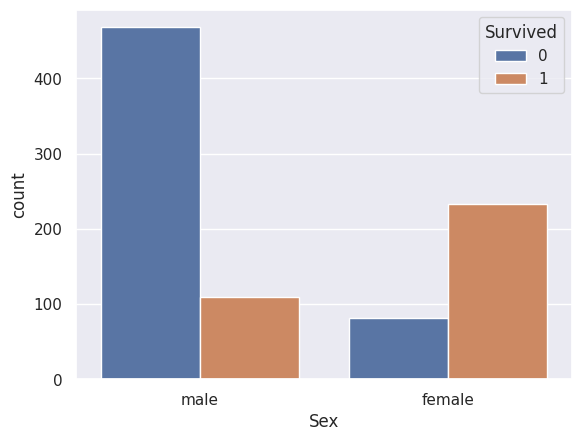

In [ ]:
# Sex Vs Survived
ax = sns.countplot(train_df, x='Sex', hue='Survived')

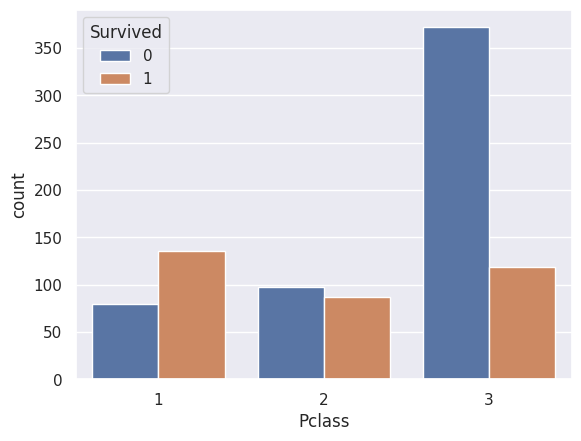

In [ ]:
ax = sns.countplot(train_df, x='Pclass', hue='Survived')

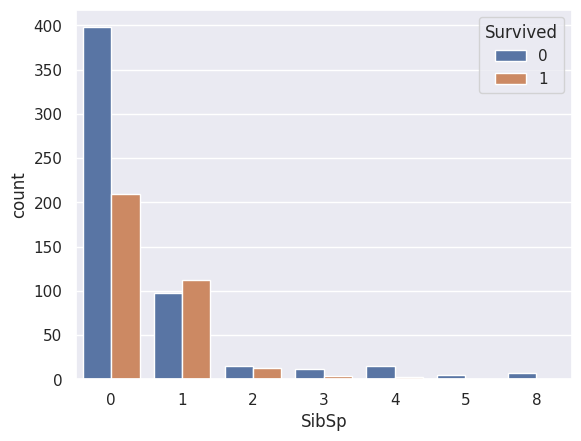

In [ ]:
ax = sns.countplot(train_df, x='SibSp', hue='Survived')

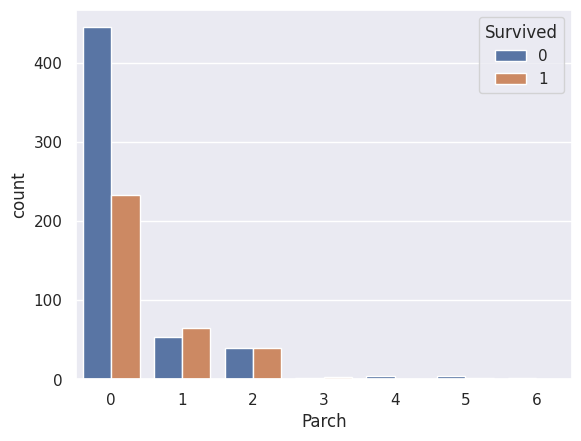

In [ ]:
ax = sns.countplot(train_df, x='Parch', hue='Survived')

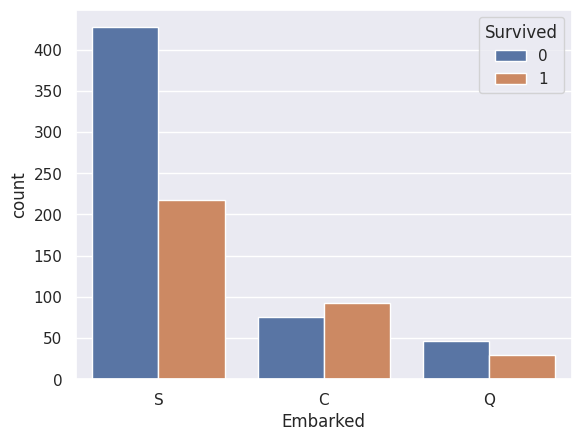

In [ ]:
ax = sns.countplot(train_df, x='Embarked', hue='Survived')

## Multivariate Analysis

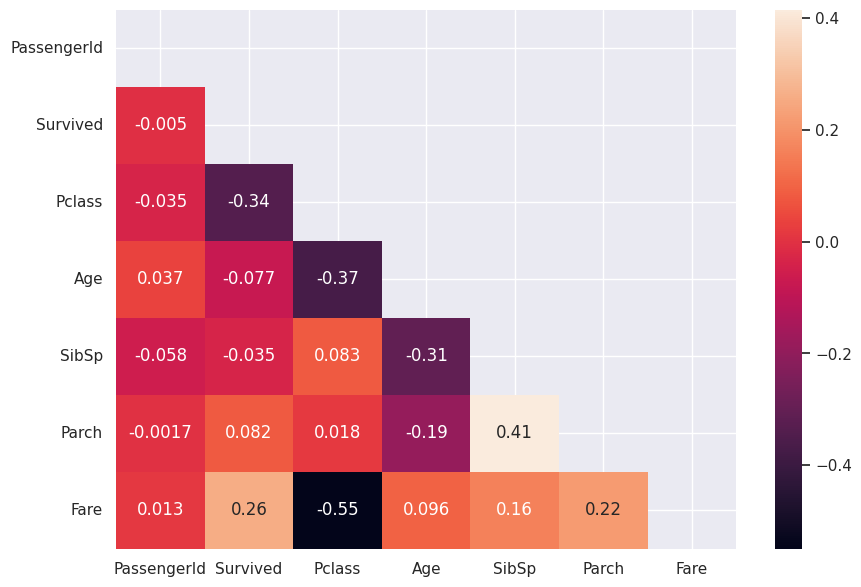

In [ ]:
fig = plt.figure(figsize=(10, 7))
corr = train_df.corr()
mask = np.triu(corr)
ax = sns.heatmap(corr, annot=True, mask=mask)

## Missing values Analysis

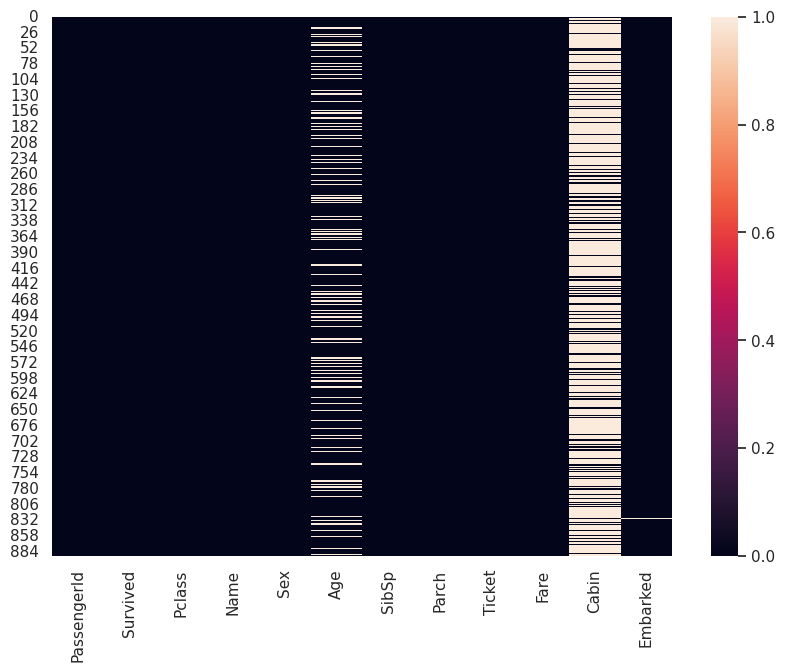

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = sns.heatmap(train_df.isnull())

In [ ]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
len(train_df) - train_df['Cabin'].isnull().sum(), train_df['Cabin'].count()

(204, 204)

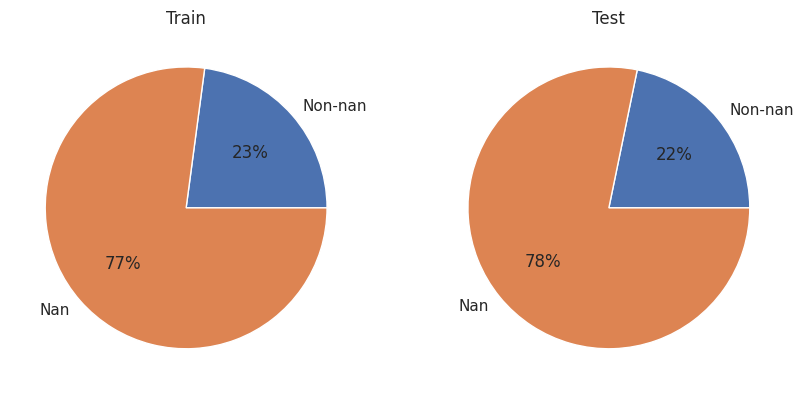

In [ ]:
train_nan = train_df['Cabin'].isnull().sum()
train_tot = train_df['Cabin'].count()
test_nan = test_df['Cabin'].isna().sum()
test_tot = test_df['Cabin'].count()

fig = plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title('Train')
plt.pie([train_tot, train_nan], labels=['Non-nan', 'Nan'], autopct='%.0f%%')

plt.subplot(1, 2, 2)
plt.title('Test')
plt.pie([test_tot, test_nan], labels=['Non-nan', 'Nan'], autopct='%.0f%%');

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**About Data:** Feature to delete

> Unwanted column `PassengerId`.

> `Cabin` column has around `80%` of `Nan` values it's better to delete the column.

> With `Name` and `Ticket` columns also we cannot get any insights. So, deleting even the `Name` and `Ticket` columns.


In [ ]:
train_data = train_df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
test_data = test_df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Treatment for outliers

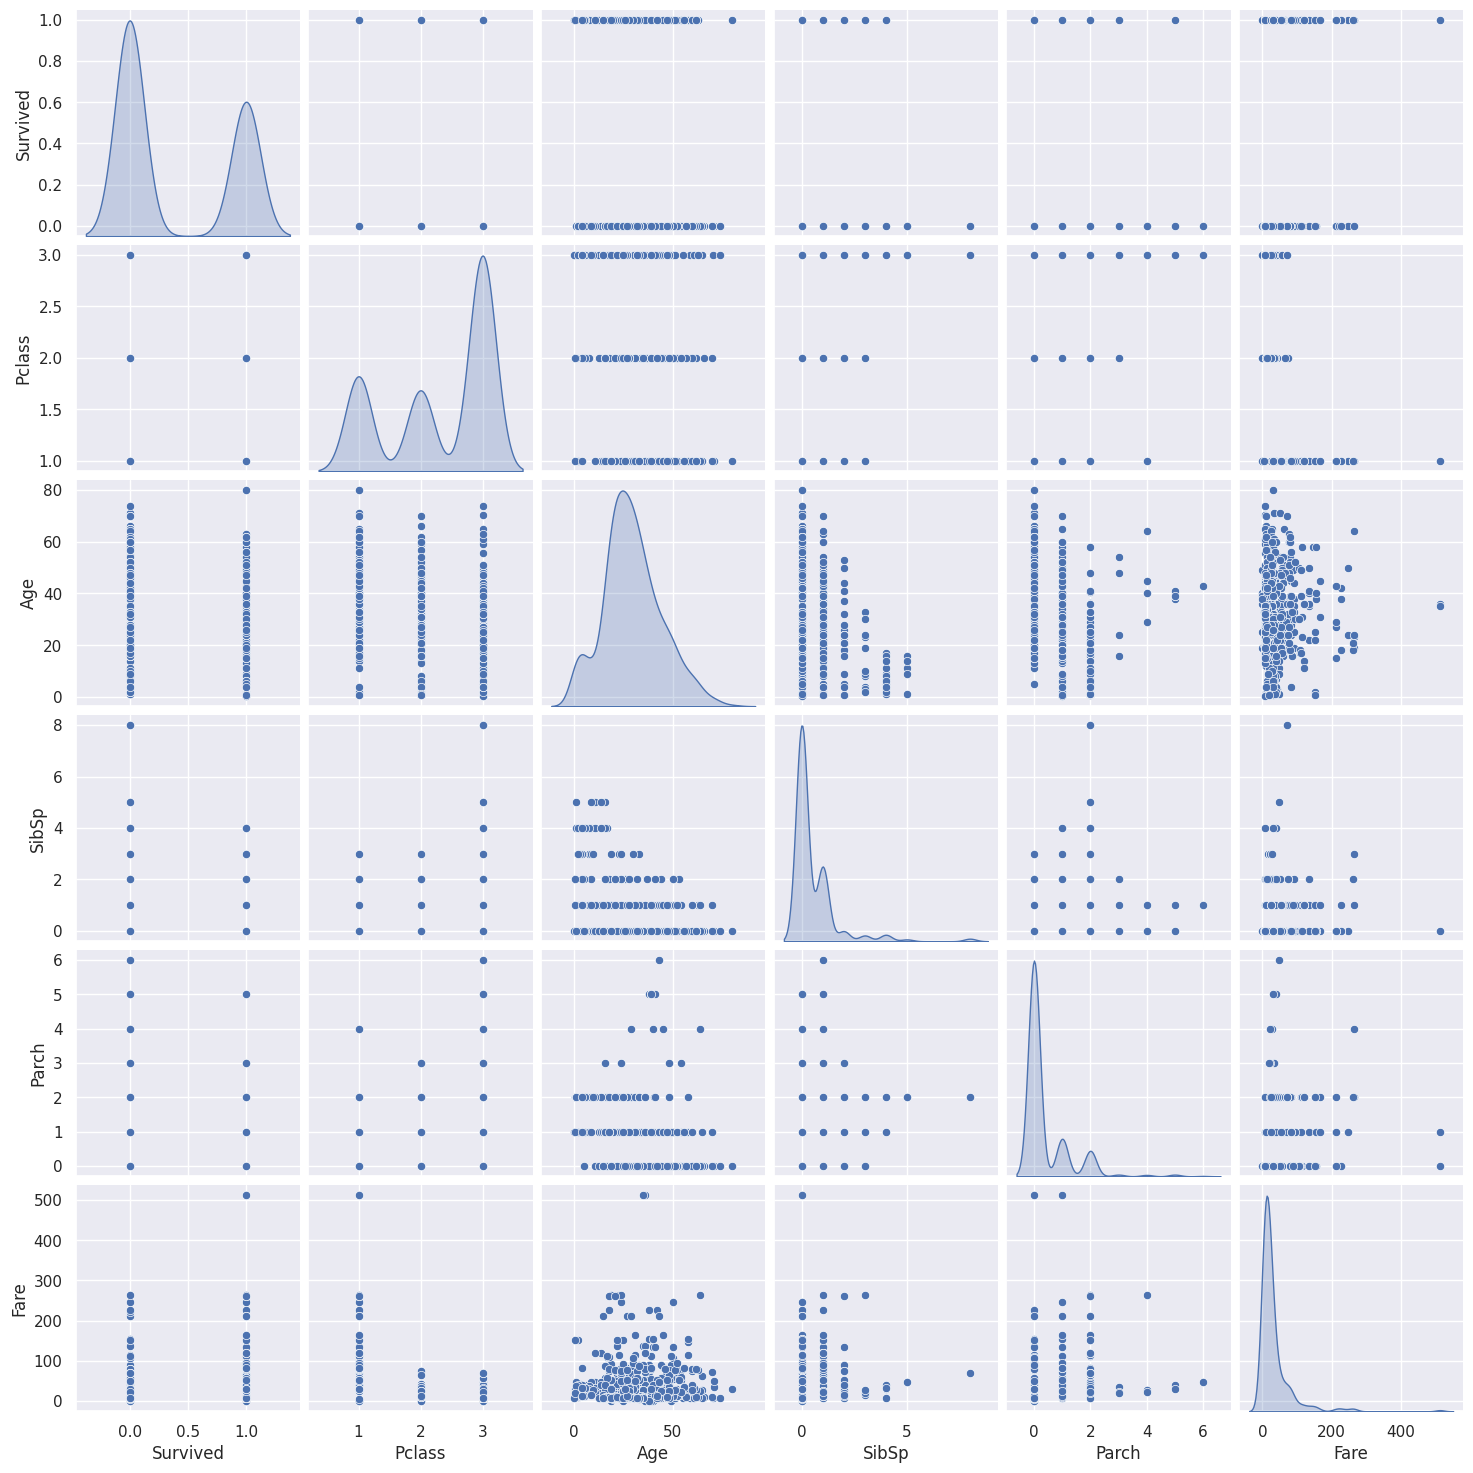

In [ ]:
ax = sns.pairplot(train_data, diag_kind='kde')

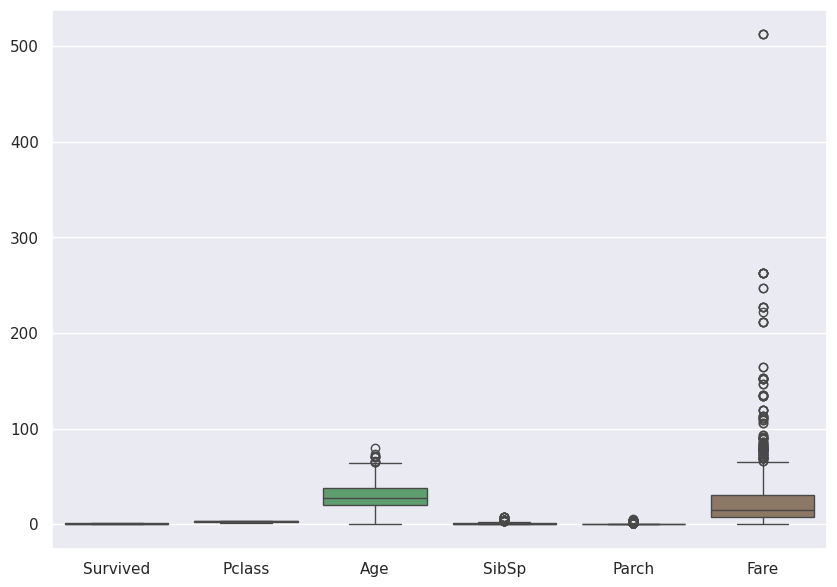

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = sns.boxplot(train_data)

**About Data:**
> Columns `Age` and `Fare` tend to have more outliers. Let's get rid of it.

In [ ]:
# Getting the numeric columns names
cols = train_data.select_dtypes(exclude='object').columns
cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
q1 = train_data['Age'].quantile(0.25)
q3 = train_data['Age'].quantile(0.75)

q1, q3

(20.125, 38.0)

In [ ]:
iqr = q3 - q1
iqr

17.875

In [ ]:
min_range = q1 - 1.5 * iqr
max_range = q3 + 1.5 * iqr

min_range, max_range

(-6.6875, 64.8125)

In [ ]:
np.percentile(train_data['Parch'], 90)

2.0

In [ ]:
for col in cols:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1
    min_range = q1 - 1.5 * iqr
    max_range = q3 + 1.5 * iqr
    if col != 'Parch':
        train_data[col] = np.where(train_data[col] < min_range, min_range, train_data[col])
        train_data[col] = np.where(train_data[col] > max_range, max_range, train_data[col])
        if col != 'Survived':
            test_data[col] = np.where(test_data[col] < min_range, min_range, test_data[col])
            test_data[col] = np.where(test_data[col] > max_range, max_range, test_data[col])
    else:
        train_data[col] = np.where(train_data[col] > np.percentile(train_data[col], 90), np.percentile(train_data[col], 90), train_data[col])

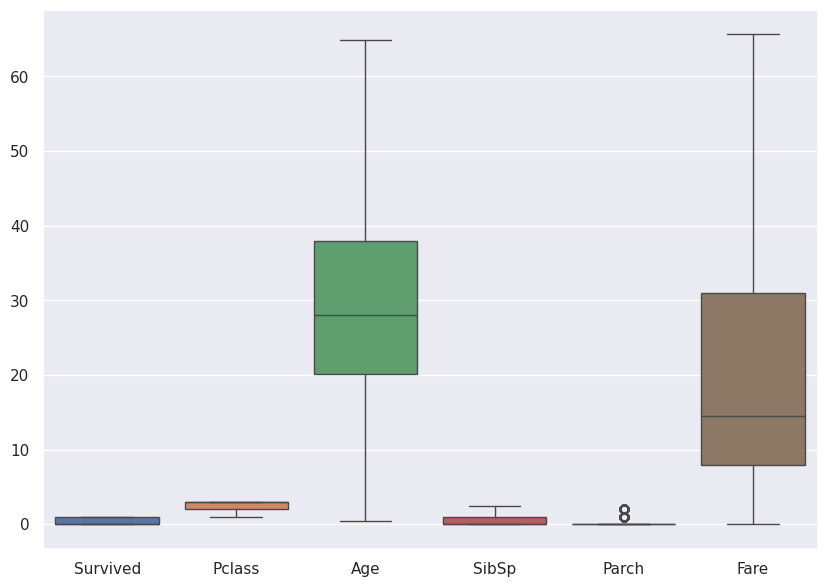

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = sns.boxplot(train_data)

## Feature Engineering on `Fare` Column

In [ ]:
train_data.Fare.describe(), test_data.Fare.describe()

(count    891.000000
 mean      24.046813
 std       20.481625
 min        0.000000
 25%        7.910400
 50%       14.454200
 75%       31.000000
 max       65.634400
 Name: Fare, dtype: float64,
 count    417.000000
 mean      24.509953
 std       20.898272
 min        0.000000
 25%        7.895800
 50%       14.454200
 75%       31.500000
 max       65.634400
 Name: Fare, dtype: float64)

In [ ]:
def fare(x):
    if x == np.nan:
        return np.nan

    if 0 <= x <= 10:
        return '0-10'
    elif 11 <= x <= 20:
        return '11-20'
    elif 21 <= x <= 30:
        return '21-30'
    elif 31 <= x <= 40:
        return '31-40'
    elif 41 <= x <= 50:
        return '41-50'
    elif 51 <= x <= 60:
        return '51-60'
    else:
        return '61-70'

In [ ]:
train_data['Fare'] = train_data['Fare'].apply(fare)
test_data['Fare'] = test_data['Fare'].apply(fare)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,0-10,S
1,1.0,1.0,female,38.0,1.0,0.0,61-70,C
2,1.0,3.0,female,26.0,0.0,0.0,0-10,S
3,1.0,1.0,female,35.0,1.0,0.0,51-60,S
4,0.0,3.0,male,35.0,0.0,0.0,0-10,S


## Splitting the data in train and validation dataset

In [ ]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=8)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((757, 7), (757,), (134, 7), (134,))

## Label Encoding the features which are categorical data

In [ ]:
X_train.select_dtypes(exclude='object').columns

Index(['Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [ ]:
X_train.select_dtypes(include='object').columns

Index(['Sex', 'Fare', 'Embarked'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

sex_encoder = LabelEncoder()
sex_encoder.fit(X_train['Sex'])
X_train['Sex'] = sex_encoder.transform(X_train['Sex'])
X_val['Sex'] = sex_encoder.transform(X_val['Sex'])
test_data['Sex'] = sex_encoder.transform(test_data['Sex'])


order = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6}
X_train['Fare'] = X_train['Fare'].map(order)
X_val['Fare'] = X_val['Fare'].map(order)
test_data['Fare'] = test_data['Fare'].map(order)


embarked_encoder = LabelEncoder()
embarked_encoder.fit(X_train['Embarked'])
X_train['Embarked'] = embarked_encoder.transform(X_train['Embarked'])
X_val['Embarked'] = embarked_encoder.transform(X_val['Embarked'])
test_data['Embarked'] = embarked_encoder.transform(test_data['Embarked'])

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
430,1.0,1,28.0,0.0,0.0,2,2
66,2.0,0,29.0,0.0,0.0,6,2
39,3.0,0,14.0,1.0,0.0,1,0
589,3.0,1,NaN,0.0,0.0,0,2
218,1.0,0,32.0,0.0,0.0,6,0


## Impute the missing data

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=8)
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns, index=X_val.index)
test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns, index=test_data.index)

In [ ]:
X_train.isna().sum().sum(), X_val.isna().sum().sum(), test_data.isna().sum().sum()

(0, 0, 0)

## Checking the correlation matrix after all the data preprocessing

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
430,1.0,1.0,28.000000,0.0,0.0,2.0,2.0
66,2.0,0.0,29.000000,0.0,0.0,6.0,2.0
39,3.0,0.0,14.000000,1.0,0.0,1.0,0.0
589,3.0,1.0,29.460735,0.0,0.0,0.0,2.0
218,1.0,0.0,32.000000,0.0,0.0,6.0,0.0


In [ ]:
X_val.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
350,3.0,1.0,23.000000,0.0,0.0,0.0,2.0
176,3.0,1.0,17.065211,2.5,1.0,2.0,2.0
723,2.0,1.0,50.000000,0.0,0.0,1.0,2.0
404,3.0,0.0,20.000000,0.0,0.0,0.0,2.0
306,1.0,0.0,37.024544,0.0,0.0,6.0,0.0


In [ ]:
data = pd.concat([pd.concat([X_train, y_train], axis=1),
                   pd.concat([X_val, y_val], axis=1)],
                  axis=0)

data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
430,1.0,1.0,28.000000,0.0,0.0,2.0,2.0,1.0
66,2.0,0.0,29.000000,0.0,0.0,6.0,2.0,1.0
39,3.0,0.0,14.000000,1.0,0.0,1.0,0.0,1.0
589,3.0,1.0,29.460735,0.0,0.0,0.0,2.0,0.0
218,1.0,0.0,32.000000,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...
846,3.0,1.0,13.095829,2.5,2.0,6.0,2.0,0.0
540,1.0,0.0,36.000000,0.0,2.0,6.0,2.0,1.0
311,1.0,0.0,18.000000,2.0,2.0,6.0,0.0,1.0
707,1.0,1.0,42.000000,0.0,0.0,2.0,2.0,1.0


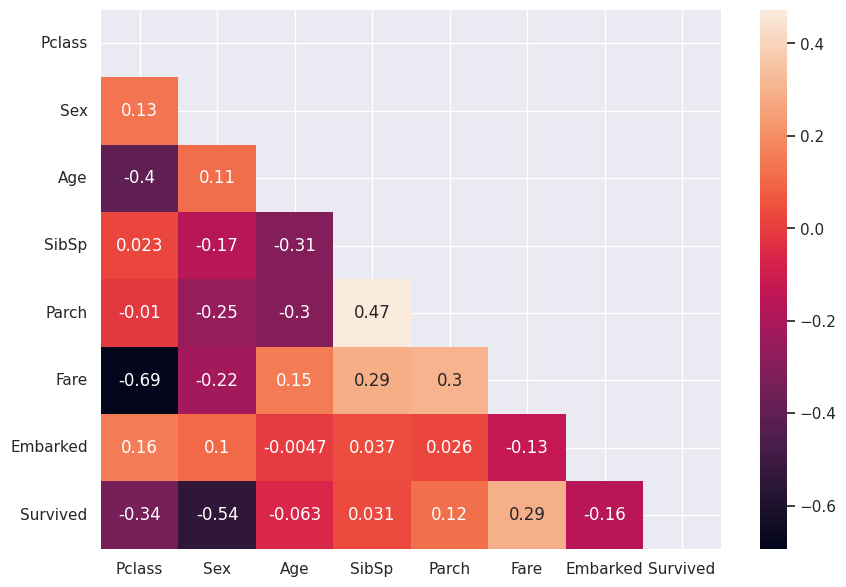

In [ ]:
fig = plt.figure(figsize=(10, 7))
corr = data.corr()
mask = np.triu(corr)
ax = sns.heatmap(corr, annot=True, mask=mask)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(random_state=8),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(random_state=8),
    'AdaBoosting': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(random_state=8),
    'XGBoost': XGBClassifier(),
}

In [ ]:
def cv_and_validation_score(models, X_train, X_val, y_train, y_val):
    cv_results = []
    val_results = []

    for name, model in models.items():
        result = cross_val_score(model, X_train, y_train, cv=5)
        cv_results.append({
            'Model Name': name,
            'CV Result': result.mean(),
        })

    for name, model in models.items():
        model.fit(X_train, y_train)

        v_pred = model.predict(X_val)
        v_accuracy = accuracy_score(y_val, v_pred)
        v_precision, v_recall, v_f1, _ = precision_recall_fscore_support(y_val, v_pred, average='weighted')

        val_results.append({
            'Model Name': name,
            'Accuracy': v_accuracy,
            'Precision': v_precision,
            'Recall': v_recall,
            'F1-score': v_f1,
        })

    return cv_results, val_results

In [ ]:
cv_results, val_results = cv_and_validation_score(models, X_train, X_val, y_train, y_val)
cv_results_df = pd.DataFrame(cv_results)
val_results_df = pd.DataFrame(val_results)

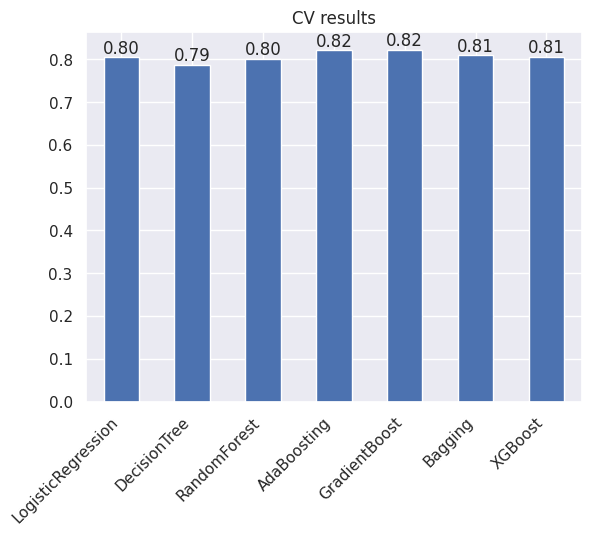

In [ ]:
ax = cv_results_df['CV Result'].plot(kind='bar')
ax.set_xticklabels(cv_results_df['Model Name'], rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title('CV results');

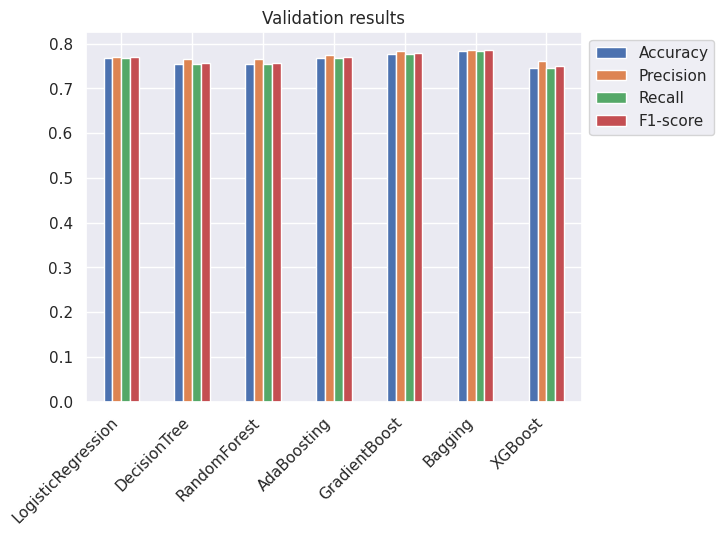

In [ ]:
ax = val_results_df.plot(kind='bar')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xticklabels(val_results_df['Model Name'], rotation=45, ha='right');
ax.set_title('Validation results');

## Scaling our data and comparing the results

### MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_norm = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
test_data_norm = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns, index=test_data.index)

In [ ]:
cv_norm_results, val_norm_results = cv_and_validation_score(models, X_train_norm, X_val_norm, y_train, y_val)
cv_norm_results_df = pd.DataFrame(cv_norm_results)
val_norm_results_df = pd.DataFrame(val_norm_results)

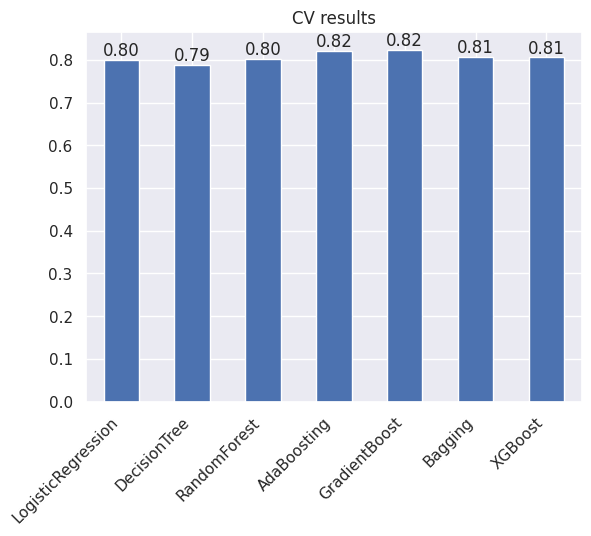

In [ ]:
ax = cv_norm_results_df['CV Result'].plot(kind='bar')
ax.set_xticklabels(cv_results_df['Model Name'], rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title('CV results');

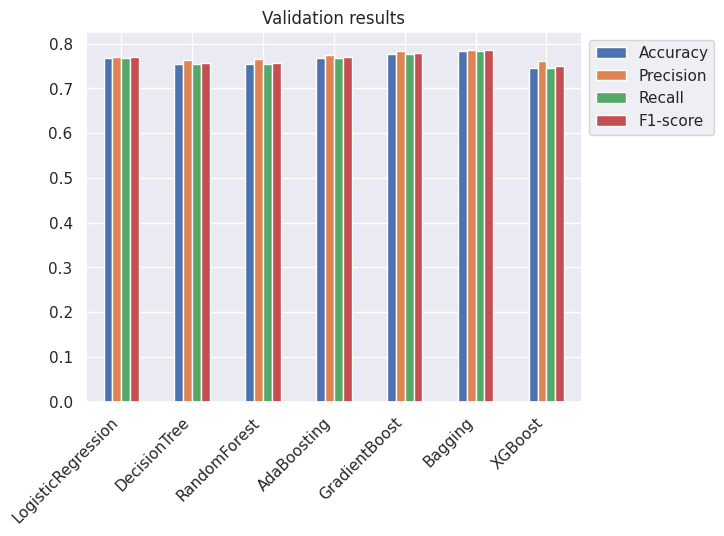

In [ ]:
ax = val_norm_results_df.plot(kind='bar')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xticklabels(val_norm_results_df['Model Name'], rotation=45, ha='right')
ax.set_title('Validation results');

## Model Building

**About Data:**
> Fitting and fine tuning the data to models which we have got the `cv` score >= `0.80`.

In [ ]:
def get_score(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    data = {
        'Model Name': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        }

    return data

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title('Validation Matrix')

In [ ]:
train_overall_results = []
val_overall_results = []

In [ ]:
def get_results(name, model, X_train, y_train, X_val, y_val):
    print('Traning Results: \n')
    y_t = model.predict(X_train)
    train_result = get_score(name, y_train, y_t)
    train_overall_results.append(train_result)
    print(pd.DataFrame(train_result, index=[0]))

    print('\n\n')

    print('Validation Results: \n')
    y_v = model.predict(X_val)
    val_result = get_score(name, y_val, y_v)
    val_overall_results.append(val_result)
    print(pd.DataFrame(val_result, index=[0]))

    print('\n\n')

    plot_confusion_matrix(y_val, y_v)

### Logistic Regression

In [ ]:
lrclf = LogisticRegression()
lrclf.fit(X_train_norm, y_train)

LogisticRegression()

Traning Results: 

           Model Name  Accuracy  Precision    Recall  F1-score
0  LogisticRegression  0.800528   0.798749  0.800528  0.798993



Validation Results: 

           Model Name  Accuracy  Precision    Recall  F1-score
0  LogisticRegression  0.768657   0.769588  0.768657  0.769079





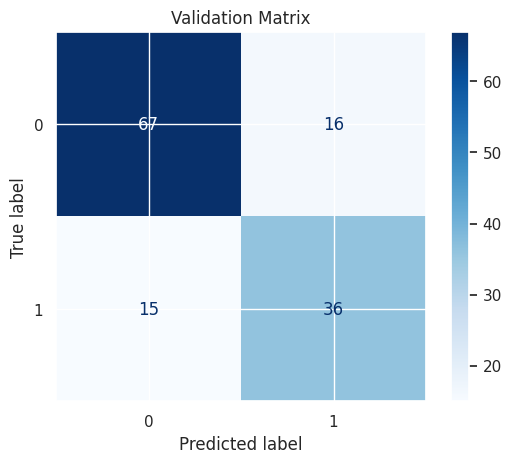

In [ ]:
get_results('LogisticRegression', lrclf, X_train_norm, y_train, X_val_norm, y_val)

### Logistic Regression - Hyperparameters Tuning

In [ ]:
lrclf_tuned = LogisticRegression(random_state=8)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

grid_obj = GridSearchCV(lrclf_tuned, params, scoring='accuracy', n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train_norm, y_train)

lrclf_tuned = grid_obj.best_estimator_
lrclf_tuned.fit(X_train_norm, y_train)

LogisticRegression(random_state=8, solver='newton-cholesky', tol=0.01)

Traning Results: 

                 Model Name  Accuracy  Precision    Recall  F1-score
0  LogisticRegression-Tuned  0.800528   0.798749  0.800528  0.798993



Validation Results: 

                 Model Name  Accuracy  Precision    Recall  F1-score
0  LogisticRegression-Tuned  0.768657   0.769588  0.768657  0.769079





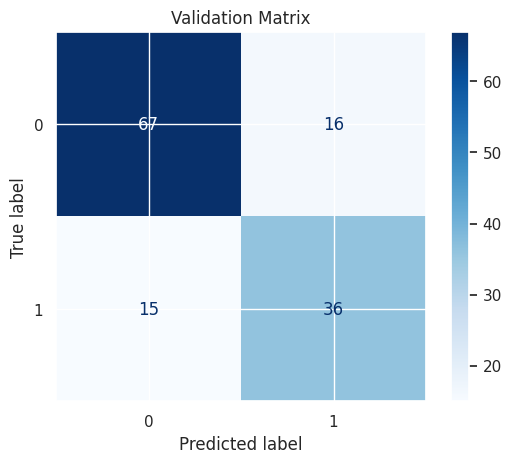

In [ ]:
get_results('LogisticRegression-Tuned', lrclf_tuned, X_train_norm, y_train, X_val_norm, y_val)

### Random Forest

In [ ]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train_norm, y_train)

RandomForestClassifier()

Traning Results: 

     Model Name  Accuracy  Precision    Recall  F1-score
0  RandomForest  0.953765   0.953843  0.953765  0.953589



Validation Results: 

     Model Name  Accuracy  Precision    Recall  F1-score
0  RandomForest  0.746269   0.760916  0.746269  0.749464





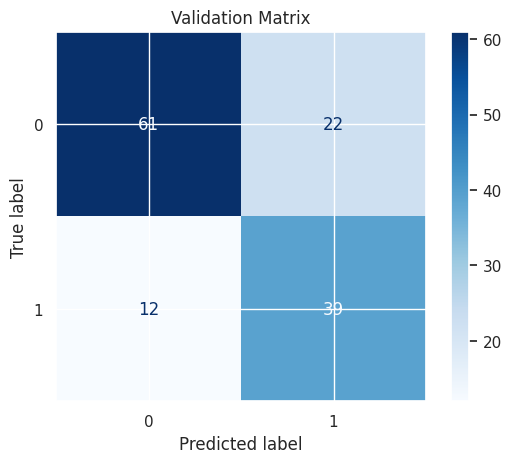

In [ ]:
get_results('RandomForest', rfclf, X_train_norm, y_train, X_val_norm, y_val)

### Random Forest - Hyperparameters Tuning

In [ ]:
rfclf_tuned = RandomForestClassifier(random_state=8)

params = {
    'n_estimators': np.arange(120, 200, 20),
    'criterion': ['entropy', 'log_loss'],
    'max_depth': [2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
}

grid_obj = GridSearchCV(rfclf_tuned, params, scoring='accuracy', n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train_norm, y_train)

rfclf_tuned = grid_obj.best_estimator_
rfclf_tuned.fit(X_train_norm, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=120,
                       random_state=8)

Traning Results: 

           Model Name  Accuracy  Precision    Recall  F1-score
0  RandomForest-Tuned  0.870542   0.873436  0.870542  0.867754



Validation Results: 

           Model Name  Accuracy  Precision    Recall  F1-score
0  RandomForest-Tuned  0.798507   0.797811  0.798507  0.798113





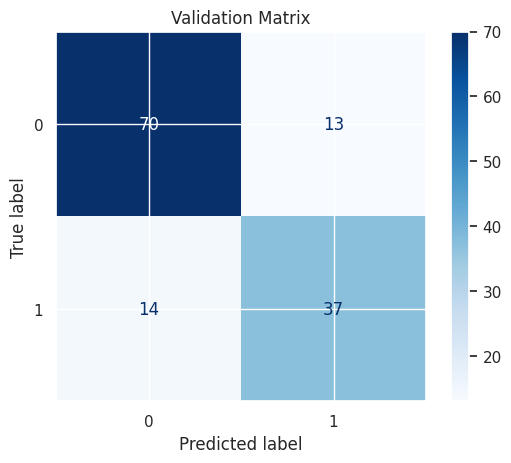

In [ ]:
get_results('RandomForest-Tuned', rfclf_tuned, X_train_norm, y_train, X_val_norm, y_val)

### GradientBoosting

In [ ]:
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train_norm, y_train)

GradientBoostingClassifier()

Traning Results: 

      Model Name  Accuracy  Precision    Recall  F1-score
0  GradientBoost  0.892999   0.893923  0.892999  0.891612



Validation Results: 

      Model Name  Accuracy  Precision    Recall  F1-score
0  GradientBoost  0.776119   0.783281  0.776119  0.778141





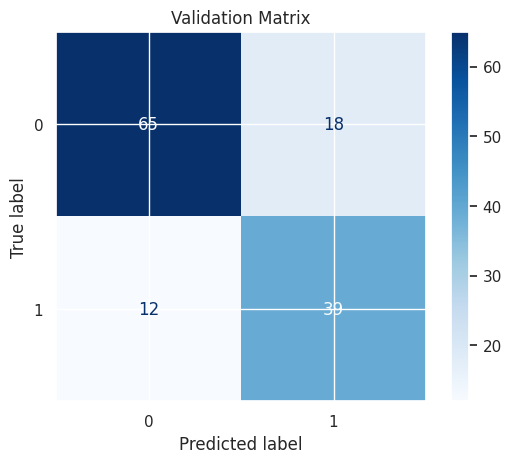

In [ ]:
get_results('GradientBoost', gbclf, X_train_norm, y_train, X_val_norm, y_val)

### GradientBoosting - Hyperparameters Tuning

In [ ]:
gbclf_tuned = GradientBoostingClassifier(random_state=8)

params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'n_estimators': np.arange(100, 200, 20),
    'max_depth': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_obj = GridSearchCV(gbclf_tuned, params, scoring='accuracy', n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train_norm, y_train)

gbclf_tuned = grid_obj.best_estimator_
gbclf_tuned.fit(X_train_norm, y_train)

GradientBoostingClassifier(loss='exponential', max_depth=2, max_features='sqrt',
                           n_estimators=160, random_state=8)

Traning Results: 

            Model Name  Accuracy  Precision    Recall  F1-score
0  GradientBoost-Tuned  0.848085   0.847173  0.848085  0.847278



Validation Results: 

            Model Name  Accuracy  Precision    Recall  F1-score
0  GradientBoost-Tuned  0.768657   0.769588  0.768657  0.769079





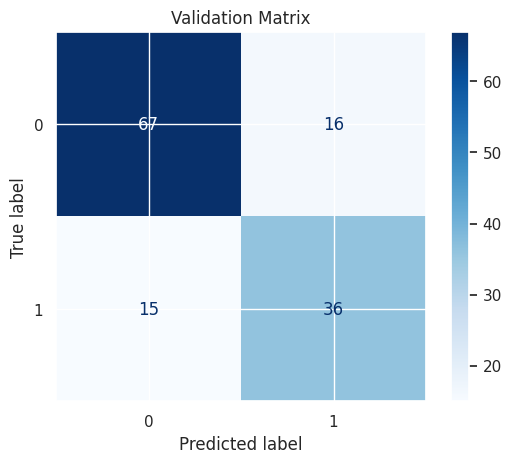

In [ ]:
get_results('GradientBoost-Tuned', gbclf_tuned, X_train_norm, y_train, X_val_norm, y_val)

### AdaBoosting

In [ ]:
adclf = AdaBoostClassifier()
adclf.fit(X_train_norm, y_train)

AdaBoostClassifier()

Traning Results: 

    Model Name  Accuracy  Precision    Recall  F1-score
0  AdaBoosting  0.838838    0.83779  0.838838   0.83792



Validation Results: 

    Model Name  Accuracy  Precision    Recall  F1-score
0  AdaBoosting  0.768657   0.774431  0.768657   0.77047





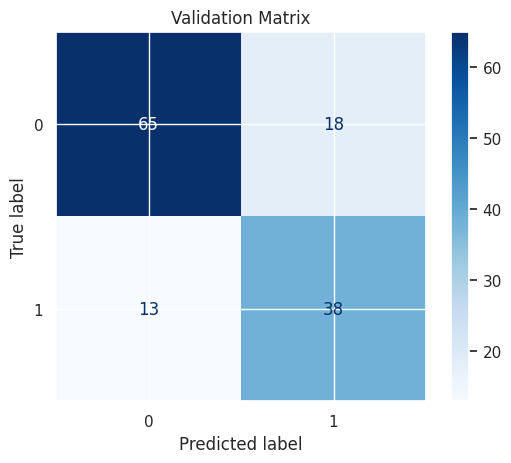

In [ ]:
get_results('AdaBoosting', adclf, X_train_norm, y_train, X_val_norm, y_val)

### AdaBoosting - Hyperparameters Tuning

In [ ]:
adclf_tuned = AdaBoostClassifier(random_state=8)

params = {
    'n_estimators': np.arange(100, 200, 20),
    'learning_rate': [1.0, 0.8, 0.6, 0.4],
    'algorithm': ['SAMME', 'SAMME.R'],
}

grid_obj = GridSearchCV(adclf_tuned, params, scoring='accuracy', n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train_norm, y_train)

adclf_tuned = grid_obj.best_estimator_
adclf_tuned.fit(X_train_norm, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=160,
                   random_state=8)

Traning Results: 

          Model Name  Accuracy  Precision    Recall  F1-score
0  AdaBoosting-Tuned  0.825627   0.824262  0.825627  0.824066



Validation Results: 

          Model Name  Accuracy  Precision    Recall  F1-score
0  AdaBoosting-Tuned  0.768657   0.771787  0.768657  0.769833





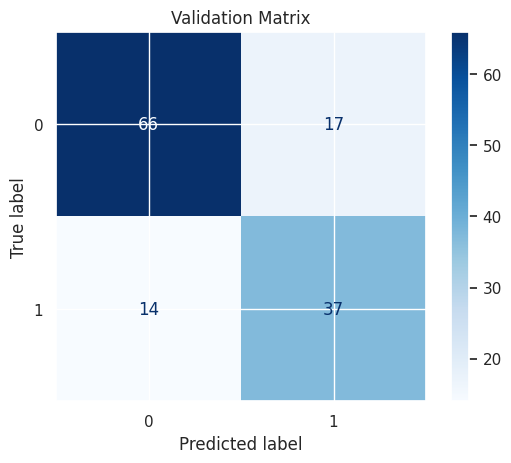

In [ ]:
get_results('AdaBoosting-Tuned', adclf_tuned, X_train_norm, y_train, X_val_norm, y_val)

### XGBoost

In [ ]:
xgbclf = XGBClassifier()
xgbclf.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Traning Results: 

  Model Name  Accuracy  Precision    Recall  F1-score
0    XGBoost  0.951123   0.951179  0.951123  0.950937



Validation Results: 

  Model Name  Accuracy  Precision    Recall  F1-score
0    XGBoost  0.746269   0.760916  0.746269  0.749464





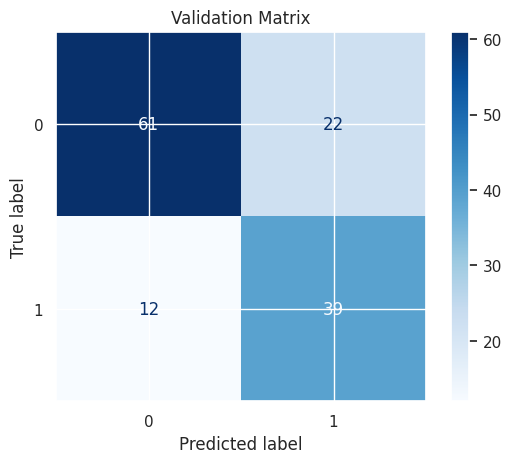

In [ ]:
get_results('XGBoost', xgbclf, X_train_norm, y_train, X_val_norm, y_val)

### XGBoost - Hyperparameters tuning

In [ ]:
xgbclf_tuned = XGBClassifier(random_state=8)

params = {
    'n_estimators': np.arange(100, 200, 20),
    'max_depth': [2, 4, 6],
    'learning_rate': [1.0, 0.8, 0.6, 0.4],
}

grid_obj = GridSearchCV(xgbclf_tuned, params, scoring='accuracy', n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train_norm, y_train)

xgbclf_tuned = grid_obj.best_estimator_
xgbclf_tuned.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=8, ...)

Traning Results: 

      Model Name  Accuracy  Precision    Recall  F1-score
0  XGBoost-Tuned  0.892999   0.892654  0.892999  0.892347



Validation Results: 

      Model Name  Accuracy  Precision    Recall  F1-score
0  XGBoost-Tuned  0.783582   0.792233  0.783582  0.785767





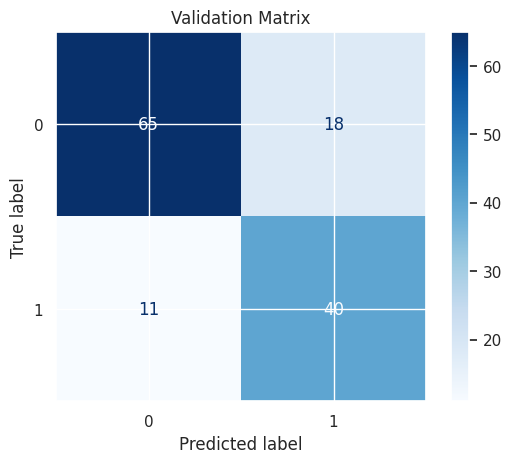

In [ ]:
get_results('XGBoost-Tuned', xgbclf_tuned, X_train_norm, y_train, X_val_norm, y_val)

### Bagging

In [ ]:
bclf = BaggingClassifier()
bclf.fit(X_train_norm, y_train)

BaggingClassifier()

Traning Results: 

  Model Name  Accuracy  Precision    Recall  F1-score
0    Bagging  0.941876   0.941767  0.941876  0.941759



Validation Results: 

  Model Name  Accuracy  Precision    Recall  F1-score
0    Bagging  0.761194    0.76856  0.761194   0.76335





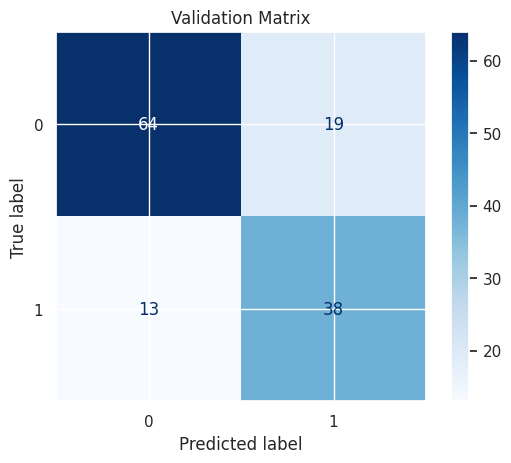

In [ ]:
get_results('Bagging', bclf, X_train_norm, y_train, X_val_norm, y_val)

## Overall results of all models

In [ ]:
train_results_df = pd.DataFrame(train_overall_results)
train_results_df

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.800528,0.798749,0.800528,0.798993
1,LogisticRegression-Tuned,0.800528,0.798749,0.800528,0.798993
2,RandomForest,0.953765,0.953843,0.953765,0.953589
3,RandomForest-Tuned,0.870542,0.873436,0.870542,0.867754
4,GradientBoost,0.892999,0.893923,0.892999,0.891612
5,GradientBoost-Tuned,0.848085,0.847173,0.848085,0.847278
6,AdaBoosting,0.838838,0.837790,0.838838,0.837920
7,AdaBoosting-Tuned,0.825627,0.824262,0.825627,0.824066
8,XGBoost,0.951123,0.951179,0.951123,0.950937
9,XGBoost-Tuned,0.892999,0.892654,0.892999,0.892347


In [ ]:
val_results_df = pd.DataFrame(val_overall_results)
val_results_df

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.768657,0.769588,0.768657,0.769079
1,LogisticRegression-Tuned,0.768657,0.769588,0.768657,0.769079
2,RandomForest,0.746269,0.760916,0.746269,0.749464
3,RandomForest-Tuned,0.798507,0.797811,0.798507,0.798113
4,GradientBoost,0.776119,0.783281,0.776119,0.778141
5,GradientBoost-Tuned,0.768657,0.769588,0.768657,0.769079
6,AdaBoosting,0.768657,0.774431,0.768657,0.770470
7,AdaBoosting-Tuned,0.768657,0.771787,0.768657,0.769833
8,XGBoost,0.746269,0.760916,0.746269,0.749464
9,XGBoost-Tuned,0.783582,0.792233,0.783582,0.785767


### Bagging with XGBTuned

In [ ]:
bclf_xgbclf = BaggingClassifier(xgbclf_tuned)
bclf_xgbclf.fit(X_train_norm, y_train)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.6, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=2,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=140,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=8, ...))

Traning Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-XGBoost-Tuned  0.885073   0.885524  0.885073  0.883689



Validation Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-XGBoost-Tuned  0.783582   0.789169  0.783582  0.785278





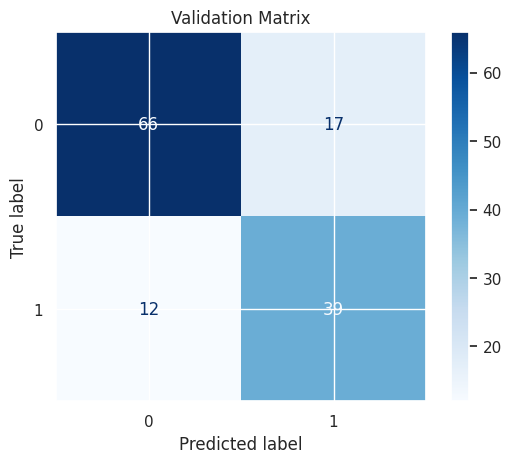

In [ ]:
get_results('Bagging-XGBoost-Tuned', bclf_xgbclf, X_train_norm, y_train, X_val_norm, y_val)

### Bagging with rfclf_tuned

In [ ]:
bclf_rfclf = BaggingClassifier(rfclf_tuned)
bclf_rfclf.fit(X_train_norm, y_train)

BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                   max_depth=6,
                                                   n_estimators=120,
                                                   random_state=8))

Traning Results: 

                   Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-RandomForest-Tuned  0.863937   0.865212  0.863937   0.86151



Validation Results: 

                   Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-RandomForest-Tuned  0.798507   0.797811  0.798507  0.798113





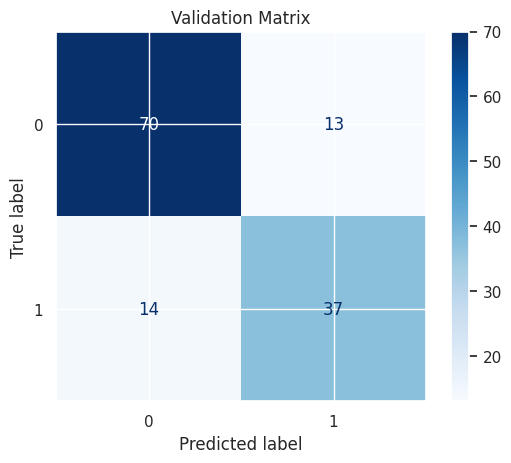

In [ ]:
get_results('Bagging-RandomForest-Tuned', bclf_rfclf, X_train_norm, y_train, X_val_norm, y_val)

### Bagging with gbclf

In [ ]:
bclf_gbclf = BaggingClassifier(gbclf)
bclf_gbclf.fit(X_train_norm, y_train)

BaggingClassifier(estimator=GradientBoostingClassifier())

Traning Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-GradientBoost  0.892999   0.893675  0.892999  0.891711



Validation Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-GradientBoost  0.761194    0.76856  0.761194   0.76335





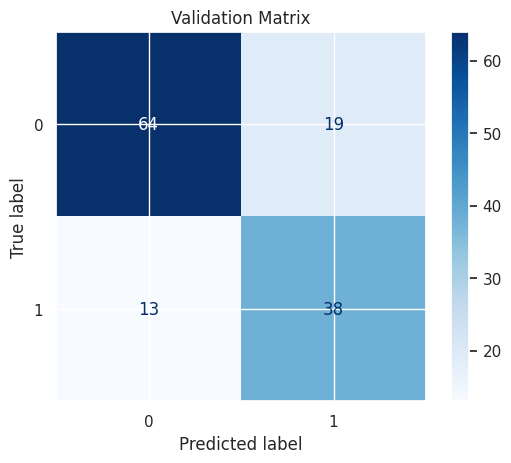

In [ ]:
get_results('Bagging-GradientBoost', bclf_gbclf, X_train_norm, y_train, X_val_norm, y_val)

### Bagging with lrclf-tuned

In [ ]:
bclf_lrclf_tuned = BaggingClassifier(lrclf_tuned)
bclf_lrclf_tuned.fit(X_train_norm, y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=8,
                                               solver='newton-cholesky',
                                               tol=0.01))

Traning Results: 

                         Model Name  Accuracy  Precision   Recall  F1-score
0  Bagging-LogisticRegression-Tuned   0.78996   0.788107  0.78996  0.788514



Validation Results: 

                         Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-LogisticRegression-Tuned  0.731343   0.731343  0.731343  0.731343





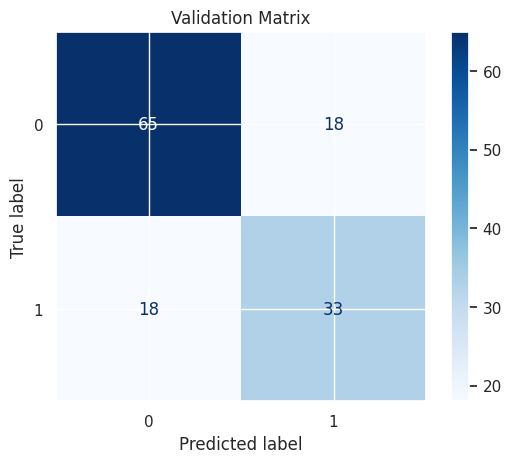

In [ ]:
get_results('Bagging-LogisticRegression-Tuned', bclf_lrclf_tuned, X_train_norm, y_train, X_val_norm, y_val)

### Bagging with adclf

In [ ]:
bclf_adclf = BaggingClassifier(adclf)
bclf_adclf.fit(X_train_norm, y_train)

BaggingClassifier(estimator=AdaBoostClassifier())

Traning Results: 

         Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-AdaBoost  0.836196   0.835375  0.836196  0.835633



Validation Results: 

         Model Name  Accuracy  Precision    Recall  F1-score
0  Bagging-AdaBoost  0.761194   0.765673  0.761194  0.762752





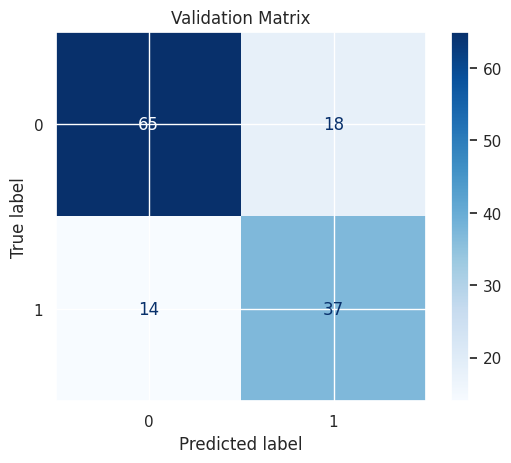

In [ ]:
get_results('Bagging-AdaBoost', bclf_adclf, X_train_norm, y_train, X_val_norm, y_val)

## Overall results of all models

In [ ]:
train_results_df = pd.DataFrame(train_overall_results)
train_results_df

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.800528,0.798749,0.800528,0.798993
1,LogisticRegression-Tuned,0.800528,0.798749,0.800528,0.798993
2,RandomForest,0.953765,0.953843,0.953765,0.953589
3,RandomForest-Tuned,0.870542,0.873436,0.870542,0.867754
4,GradientBoost,0.892999,0.893923,0.892999,0.891612
5,GradientBoost-Tuned,0.848085,0.847173,0.848085,0.847278
6,AdaBoosting,0.838838,0.837790,0.838838,0.837920
7,AdaBoosting-Tuned,0.825627,0.824262,0.825627,0.824066
8,XGBoost,0.951123,0.951179,0.951123,0.950937
9,XGBoost-Tuned,0.892999,0.892654,0.892999,0.892347


In [ ]:
val_results_df = pd.DataFrame(val_overall_results)
val_results_df

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.768657,0.769588,0.768657,0.769079
1,LogisticRegression-Tuned,0.768657,0.769588,0.768657,0.769079
2,RandomForest,0.746269,0.760916,0.746269,0.749464
3,RandomForest-Tuned,0.798507,0.797811,0.798507,0.798113
4,GradientBoost,0.776119,0.783281,0.776119,0.778141
5,GradientBoost-Tuned,0.768657,0.769588,0.768657,0.769079
6,AdaBoosting,0.768657,0.774431,0.768657,0.770470
7,AdaBoosting-Tuned,0.768657,0.771787,0.768657,0.769833
8,XGBoost,0.746269,0.760916,0.746269,0.749464
9,XGBoost-Tuned,0.783582,0.792233,0.783582,0.785767


## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

### Stacking classifier 1

In [ ]:
estimators_1 = [
    ('Bagging with Logistic Regression tuned', bclf_lrclf_tuned),
    ('Bagging with Gradient Boost', bclf_gbclf)
]

final_estimator = bclf_rfclf

stack_clf_1 = StackingClassifier(estimators=estimators_1,
                                 final_estimator=final_estimator,
                                 cv=5, n_jobs=-1)

stack_clf_1.fit(X_train_norm, y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging with Logistic Regression tuned',
                                BaggingClassifier(estimator=LogisticRegression(random_state=8,
                                                                               solver='newton-cholesky',
                                                                               tol=0.01))),
                               ('Bagging with Gradient Boost',
                                BaggingClassifier(estimator=GradientBoostingClassifier()))],
                   final_estimator=BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                                                      max_depth=6,
                                                                                      n_estimators=120,
                                                                                      random_state=8)),
                   n_jobs=-1)

Traning Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-1  0.870542    0.86989  0.870542  0.869804



Validation Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-1  0.761194    0.76856  0.761194   0.76335





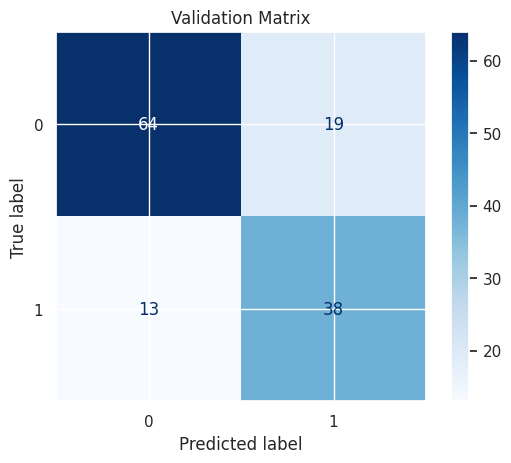

In [ ]:
get_results('Stacking-classifier-1', stack_clf_1, X_train_norm, y_train, X_val_norm, y_val)

### Stacking classifier 2

In [ ]:
estimators_2 = [
    ('Bagging with XGBoost tuned', bclf_xgbclf),
    ('Bagging with Random Forest tuned', bclf_rfclf),
    ('Bagging with Gradient Boost', bclf_gbclf),
]

final_estimator = rfclf_tuned

stack_clf_2 = StackingClassifier(estimators=estimators_2,
                                 final_estimator=final_estimator,
                                 cv=5, n_jobs=-1)

stack_clf_2.fit(X_train_norm, y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging with XGBoost tuned',
                                BaggingClassifier(estimator=XGBClassifier(base_score=None,
                                                                          booster=None,
                                                                          callbacks=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          device=None,
                                                                          early_stopping_rounds=None,
                                                                          enable_categorical=False,
                                                                          eval_metric=None,
                                                                          feature_types=None,
                                                                          gamma=None,
                                                                          grow_policy=None,
                                                                          import...
                               ('Bagging with Random Forest tuned',
                                BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                                                   max_depth=6,
                                                                                   n_estimators=120,
                                                                                   random_state=8))),
                               ('Bagging with Gradient Boost',
                                BaggingClassifier(estimator=GradientBoostingClassifier()))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=6,
                                                          n_estimators=120,
                                                          random_state=8),
                   n_jobs=-1)

Traning Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-2  0.877147   0.879374  0.877147  0.874828



Validation Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-2  0.813433   0.812797  0.813433  0.813068





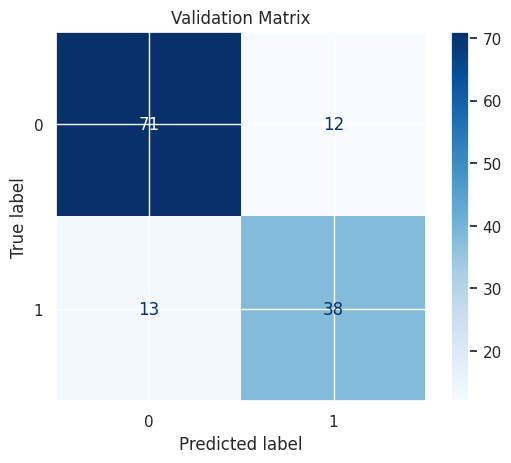

In [ ]:
get_results('Stacking-classifier-2', stack_clf_2, X_train_norm, y_train, X_val_norm, y_val)

### Stacking classifier 3

In [ ]:
estimators_3 = [
    ('Bagging with XGBoost tuned', bclf_xgbclf),
    ('Bagging with Random Forest tuned', bclf_rfclf),
    ('Bagging with Gradient Boost', bclf_gbclf),
    ('Bagging with AdaBoost', bclf_adclf),
    ('XGBoost tuned', xgbclf_tuned),
]

final_estimator = rfclf_tuned

stack_clf_3 = StackingClassifier(estimators=estimators_3,
                                 final_estimator=final_estimator,
                                 cv=5, n_jobs=-1)

stack_clf_3.fit(X_train_norm, y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging with XGBoost tuned',
                                BaggingClassifier(estimator=XGBClassifier(base_score=None,
                                                                          booster=None,
                                                                          callbacks=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          device=None,
                                                                          early_stopping_rounds=None,
                                                                          enable_categorical=False,
                                                                          eval_metric=None,
                                                                          feature_types=None,
                                                                          gamma=None,
                                                                          grow_policy=None,
                                                                          import...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=2,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=140, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=8, ...))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=6,
                                                          n_estimators=120,
                                                          random_state=8),
                   n_jobs=-1)

Traning Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-3  0.859974   0.859247  0.859974  0.858838



Validation Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-3  0.776119   0.778045  0.776119  0.776907





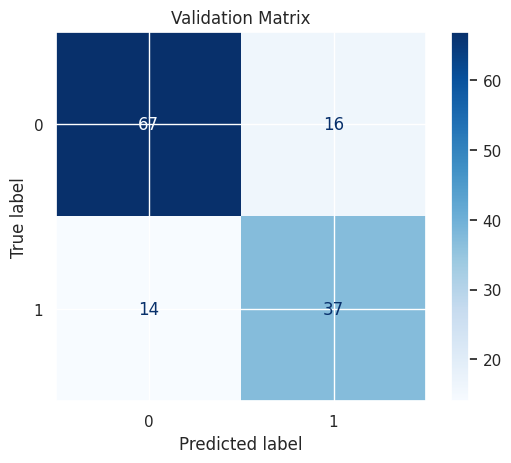

In [ ]:
get_results('Stacking-classifier-3', stack_clf_3, X_train_norm, y_train, X_val_norm, y_val)

### Stacking classifier 4

In [ ]:
estimators = [
    ('Stacking Classifier 2', stack_clf_2),
]

final_estimator = rfclf_tuned

stack_clf_4 = StackingClassifier(estimators=estimators,
                                 final_estimator=final_estimator,
                                 cv=5, n_jobs=-1)

stack_clf_4.fit(X_train_norm, y_train)

StackingClassifier(cv=5,
                   estimators=[('Stacking Classifier 2',
                                StackingClassifier(cv=5,
                                                   estimators=[('Bagging with '
                                                                'XGBoost tuned',
                                                                BaggingClassifier(estimator=XGBClassifier(base_score=None,
                                                                                                          booster=None,
                                                                                                          callbacks=None,
                                                                                                          colsample_bylevel=None,
                                                                                                          colsample_bynode=None,
                                                                                                          colsample_bytree=None,
                                                                                                          device=None,
                                                                                                          early_stopping_rounds=None,
                                                                                                          enable_categorical=False,
                                                                                                          eval_metr...
                                                                                                                   n_estimators=120,
                                                                                                                   random_state=8))),
                                                               ('Bagging with '
                                                                'Gradient '
                                                                'Boost',
                                                                BaggingClassifier(estimator=GradientBoostingClassifier()))],
                                                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                                                          max_depth=6,
                                                                                          n_estimators=120,
                                                                                          random_state=8),
                                                   n_jobs=-1))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=6,
                                                          n_estimators=120,
                                                          random_state=8),
                   n_jobs=-1)

Traning Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-4  0.828269   0.827509  0.828269  0.825635



Validation Results: 

              Model Name  Accuracy  Precision    Recall  F1-score
0  Stacking-classifier-4  0.708955   0.712624  0.708955  0.710435





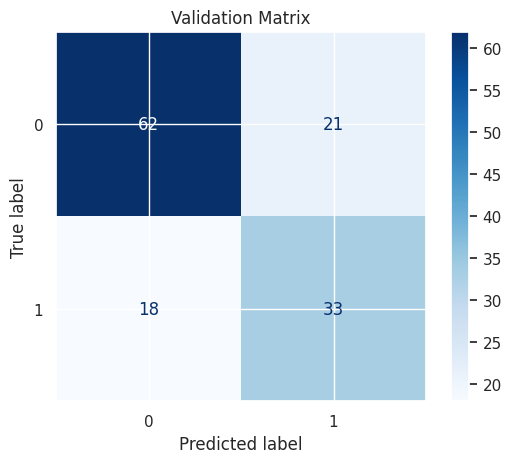

In [ ]:
get_results('Stacking-classifier-4', stack_clf_4, X_train_norm, y_train, X_val_norm, y_val)

In [ ]:
train_results_df = pd.DataFrame(train_overall_results)
train_results_df

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.800528,0.798749,0.800528,0.798993
1,LogisticRegression-Tuned,0.800528,0.798749,0.800528,0.798993
2,RandomForest,0.953765,0.953843,0.953765,0.953589
3,RandomForest-Tuned,0.870542,0.873436,0.870542,0.867754
4,GradientBoost,0.892999,0.893923,0.892999,0.891612
5,GradientBoost-Tuned,0.848085,0.847173,0.848085,0.847278
6,AdaBoosting,0.838838,0.837790,0.838838,0.837920
7,AdaBoosting-Tuned,0.825627,0.824262,0.825627,0.824066
8,XGBoost,0.951123,0.951179,0.951123,0.950937
9,XGBoost-Tuned,0.892999,0.892654,0.892999,0.892347


In [ ]:
val_results_df = pd.DataFrame(val_overall_results)
val_results_df

,Model Name,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.768657,0.769588,0.768657,0.769079
1,LogisticRegression-Tuned,0.768657,0.769588,0.768657,0.769079
2,RandomForest,0.746269,0.760916,0.746269,0.749464
3,RandomForest-Tuned,0.798507,0.797811,0.798507,0.798113
4,GradientBoost,0.776119,0.783281,0.776119,0.778141
5,GradientBoost-Tuned,0.768657,0.769588,0.768657,0.769079
6,AdaBoosting,0.768657,0.774431,0.768657,0.770470
7,AdaBoosting-Tuned,0.768657,0.771787,0.768657,0.769833
8,XGBoost,0.746269,0.760916,0.746269,0.749464
9,XGBoost-Tuned,0.783582,0.792233,0.783582,0.785767


**About Data:**
> By the insights found `Stacking-classifier-2` performs best results.

## Predicting `test_data_norm` with `stack_clf_2`.

In [ ]:
X_train_norm.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
430,0.0,1.0,0.428311,0.0,0.0,0.333333,0.666667
66,0.5,0.0,0.443841,0.0,0.0,1.000000,0.666667
39,1.0,0.0,0.210894,0.4,0.0,0.166667,0.000000
589,1.0,1.0,0.450996,0.0,0.0,0.000000,0.666667
218,0.0,0.0,0.490430,0.0,0.0,1.000000,0.000000


In [ ]:
test_data_norm.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.529254,0.0,0.0,0.000000,0.333333
1,1.0,0.0,0.723376,0.4,0.0,0.000000,0.666667
2,0.5,1.0,0.956323,0.0,0.0,0.000000,0.333333
3,1.0,1.0,0.412781,0.0,0.0,0.000000,0.666667
4,1.0,0.0,0.335132,0.4,0.5,0.166667,0.666667


In [ ]:
preds = stack_clf_2.predict(test_data_norm)
preds

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [ ]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
gender_df.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'].to_list(),
    'Survived': preds
})

In [ ]:
submission_df['Survived'] = submission_df['Survived'].astype('int64')
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission_df.to_csv('gender_submission.csv', index=False)

# Titanic Project with Neural Networks

In [19]:
import tensorflow as tf

In [20]:
X_train_norm.shape

(757, 7)

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train)).batch(64).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_norm, y_val)).batch(64).prefetch(tf.data.AUTOTUNE)

In [22]:
train_dataset, val_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

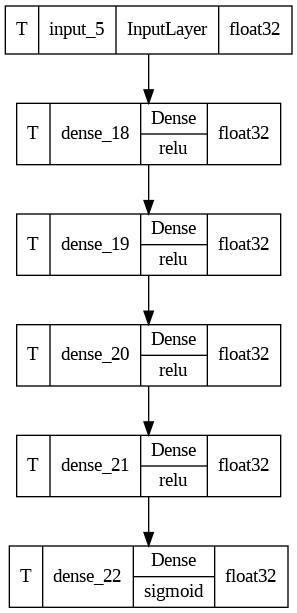

In [54]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_dtype=True, show_layer_names=True, show_trainable=True)

In [57]:
!rm -rf tmp

In [58]:
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath='tmp/ModelCheckpoint',
                                                                  monitor='val_accuracy',
                                                                  save_weights_only=True,
                                                                  save_best_only=True)])

Epoch 1/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2879 - accuracy: 0.8732 - val_loss: 0.6001 - val_accuracy: 0.7985
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2894 - accuracy: 0.8771 - val_loss: 0.6070 - val_accuracy: 0.7985
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2869 - accuracy: 0.8732 - val_loss: 0.6081 - val_accuracy: 0.7985
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.8719 - val_loss: 0.6110 - val_accuracy: 0.7985
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.8719 - val_loss: 0.6084 - val_accuracy: 0.7761
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.8719 - val_loss: 0.6080 - val_accuracy: 0.8060
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.8745 - val_loss: 0.6118 - val_accuracy: 0.7985
Epoch 8/100
1

In [59]:
model.load_weights('/content/tmp/ModelCheckpoint')

In [60]:
model.evaluate(val_dataset)

3/3 [==============================] - 0s 11ms/step - loss: 0.6372 - accuracy: 0.8209


[0.637215256690979, 0.8208954930305481]

In [37]:
y_prob = model.predict(test_data_norm)
y_prob[:10]

14/14 [==============================] - 0s 3ms/step


array([[0.06907553],
       [0.43609643],
       [0.00752202],
       [0.07324046],
       [0.09033947],
       [0.07922853],
       [0.559574  ],
       [0.0420311 ],
       [0.7473177 ],
       [0.0845311 ]], dtype=float32)

In [40]:
y_pred = tf.cast(tf.round(tf.squeeze(y_prob)), tf.int32)
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32)>

In [42]:
submission_neural_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred.numpy()
})

submission_neural_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [43]:
submission_neural_df.to_csv('gender_submission.csv', index=False)